# 朴素贝叶斯算法实例：文档分类

参考资料：黄永昌《scikit-learn机器学习：常用算法原理及编程实战》

In [1]:
%time
from sklearn.datasets import load_files

news_train = load_files(container_path='./datasets/mlcomp/379/train/')
news_test = load_files(container_path='./datasets/mlcomp/379/test/')

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 11.9 µs


## 特征工程：把文字转换成数字矩阵

`TfidfVectorizer` 这个类的作用：把文档转换成数值矩阵，矩阵的每一行表示原来的数据的一个文档，每一行的每个元素表示相应的词语的重要性。

In [2]:
%time
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(encoding='latin-1')
X_train = vectorizer.fit_transform(news_train.data)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


In [3]:
vectorizer.get_feature_names()[-30:]

['zzneu',
 'zznki',
 'zznkj',
 'zznkjz',
 'zznkzz',
 'zzo',
 'zzr1100',
 'zzt',
 'zzy_3w',
 'zzz',
 'zzzoh',
 'zzzz',
 'zzzzzz',
 'zzzzzzt',
 'ªl',
 '³ation',
 'º_________________________________________________º_____________________º',
 'ºnd',
 'çait',
 'çon',
 'ère',
 'ée',
 'égligent',
 'élangea',
 'érale',
 'ête',
 'íålittin',
 'ñaustin',
 'ýé',
 'ÿhooked']

In [4]:
len(vectorizer.get_feature_names())

130274

In [5]:
X_train.toarray().shape

(13180, 130274)

## 模型训练

In [6]:
%time
from sklearn.naive_bayes import MultinomialNB

y_train = news_train.target
mnb = MultinomialNB(alpha=0.0001) # alpha 表示平滑参数，其值越小，越容易造成过拟合，值太大，容易造成欠拟合。
mnb.fit(X_train,y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs


MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)

+ alpha 表示平滑参数，其值越小，越容易造成过拟合，值太大，容易造成欠拟合。

In [7]:
# 把测试数据集同样地，做特征工程，变成 tfidf 的矩阵
X_test = vectorizer.transform(news_test.data)
y_test = news_test.target

In [8]:
y_pred = mnb.predict(X_test)

### 模型评价

In [9]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_test, y_pred)

0.9088172804532578

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       245
           1       0.80      0.90      0.85       298
           2       0.82      0.79      0.80       292
           3       0.81      0.80      0.81       301
           4       0.90      0.91      0.91       256
           5       0.88      0.88      0.88       297
           6       0.87      0.81      0.84       290
           7       0.92      0.93      0.92       324
           8       0.96      0.96      0.96       294
           9       0.97      0.94      0.96       315
          10       0.96      0.99      0.98       302
          11       0.95      0.96      0.95       297
          12       0.91      0.85      0.88       313
          13       0.96      0.96      0.96       277
          14       0.94      0.97      0.96       305
          15       0.93      0.96      0.94       293
          16       0.91      0.96      0.93       246
          17       0.96    

+ 通过混淆矩阵，可以看到每个类别被分错的情况。

In [11]:
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test, y_pred)

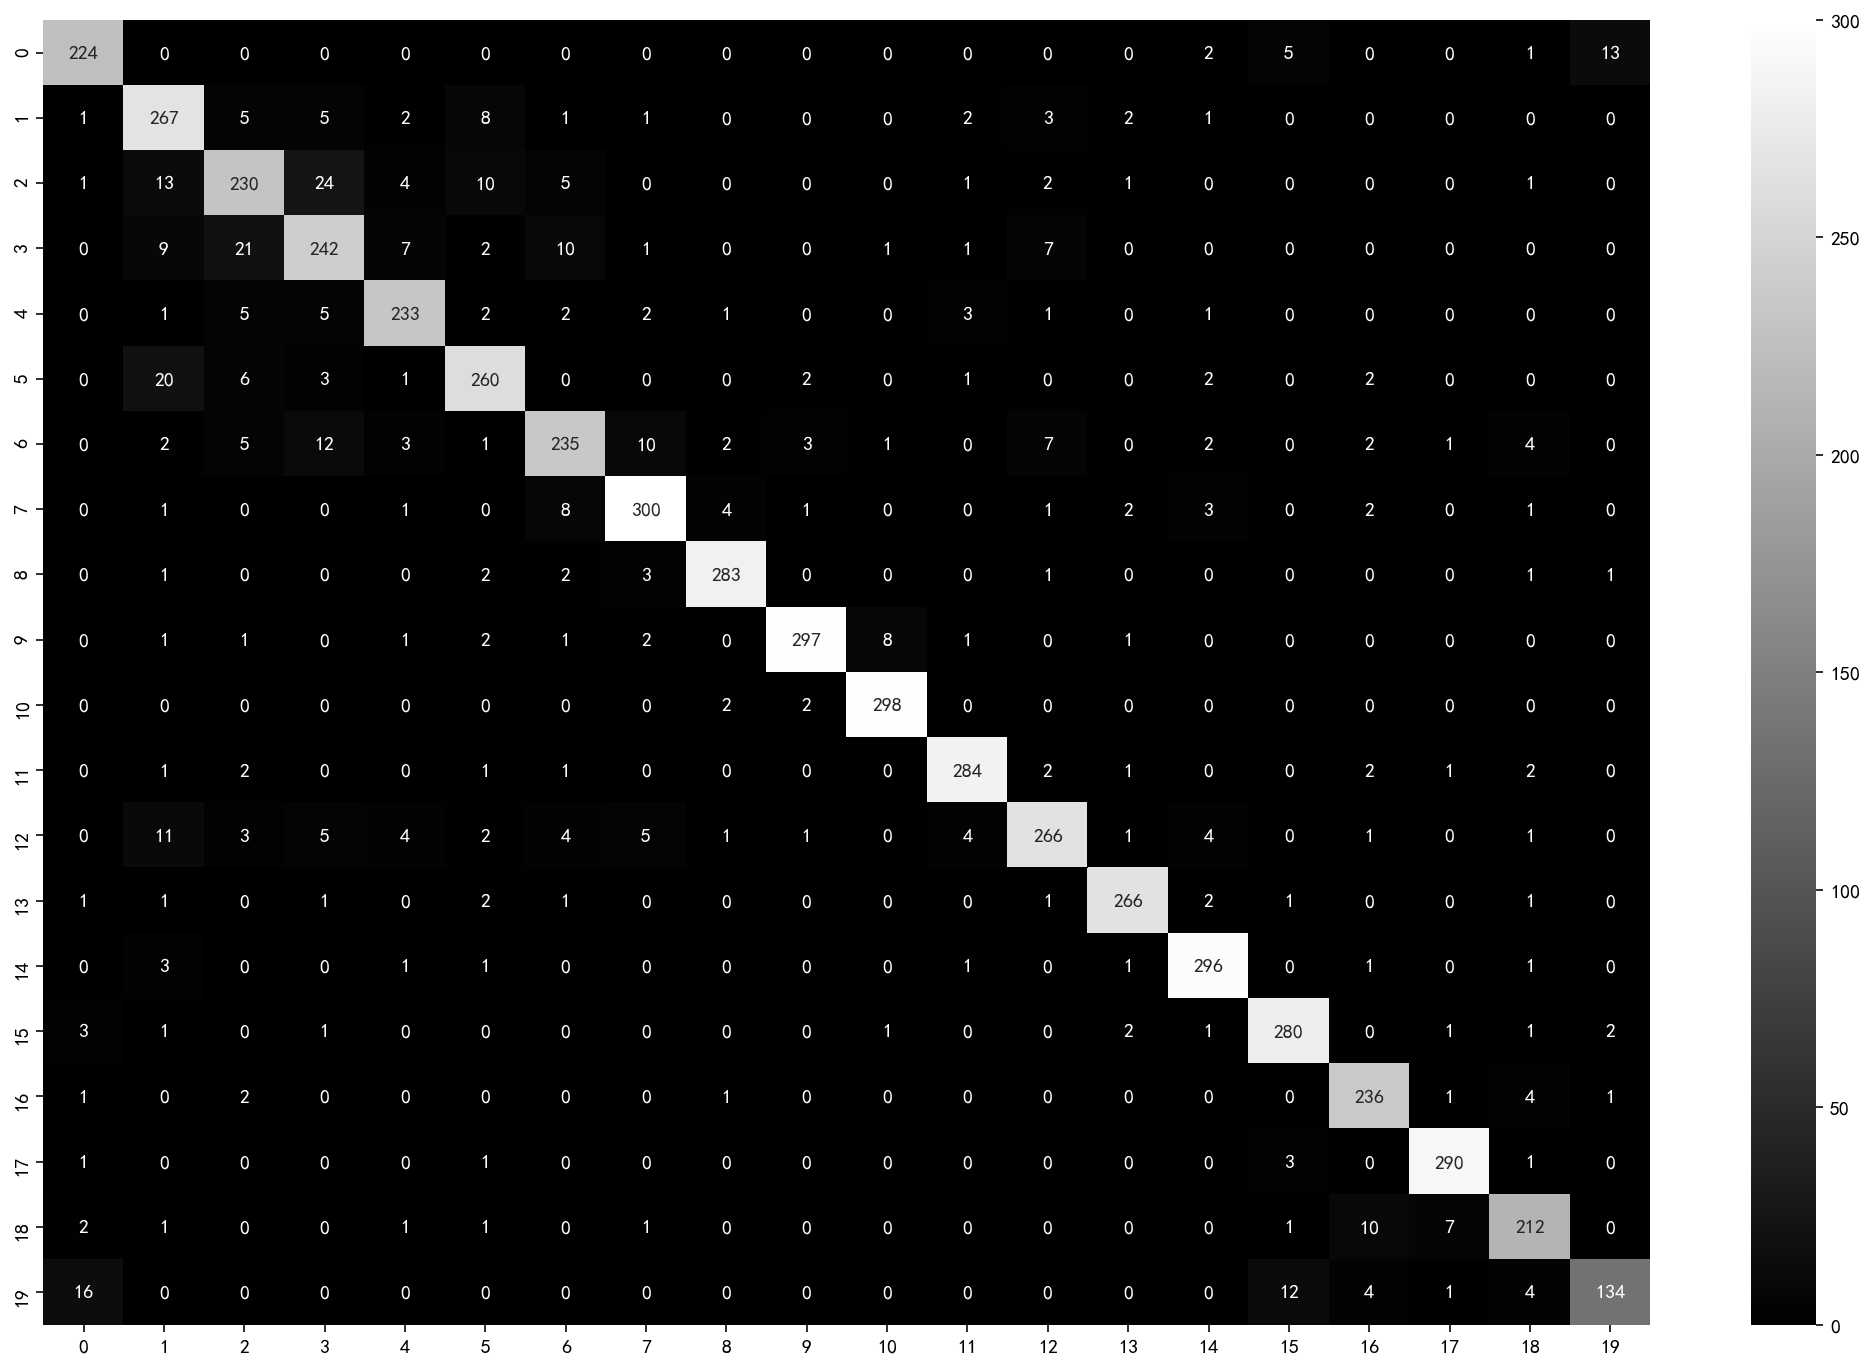

In [12]:
import seaborn as sns

plt.figure(figsize=(18, 12))
sns.heatmap(con_mat, annot=True, fmt='d', cmap=plt.cm.gray)
plt.show()

### 更清楚地看到哪些类别容易混淆。

In [14]:
import numpy as np

# 把对掉线都弄成 0 ，不让他干扰我们
np.fill_diagonal(con_mat, 0)

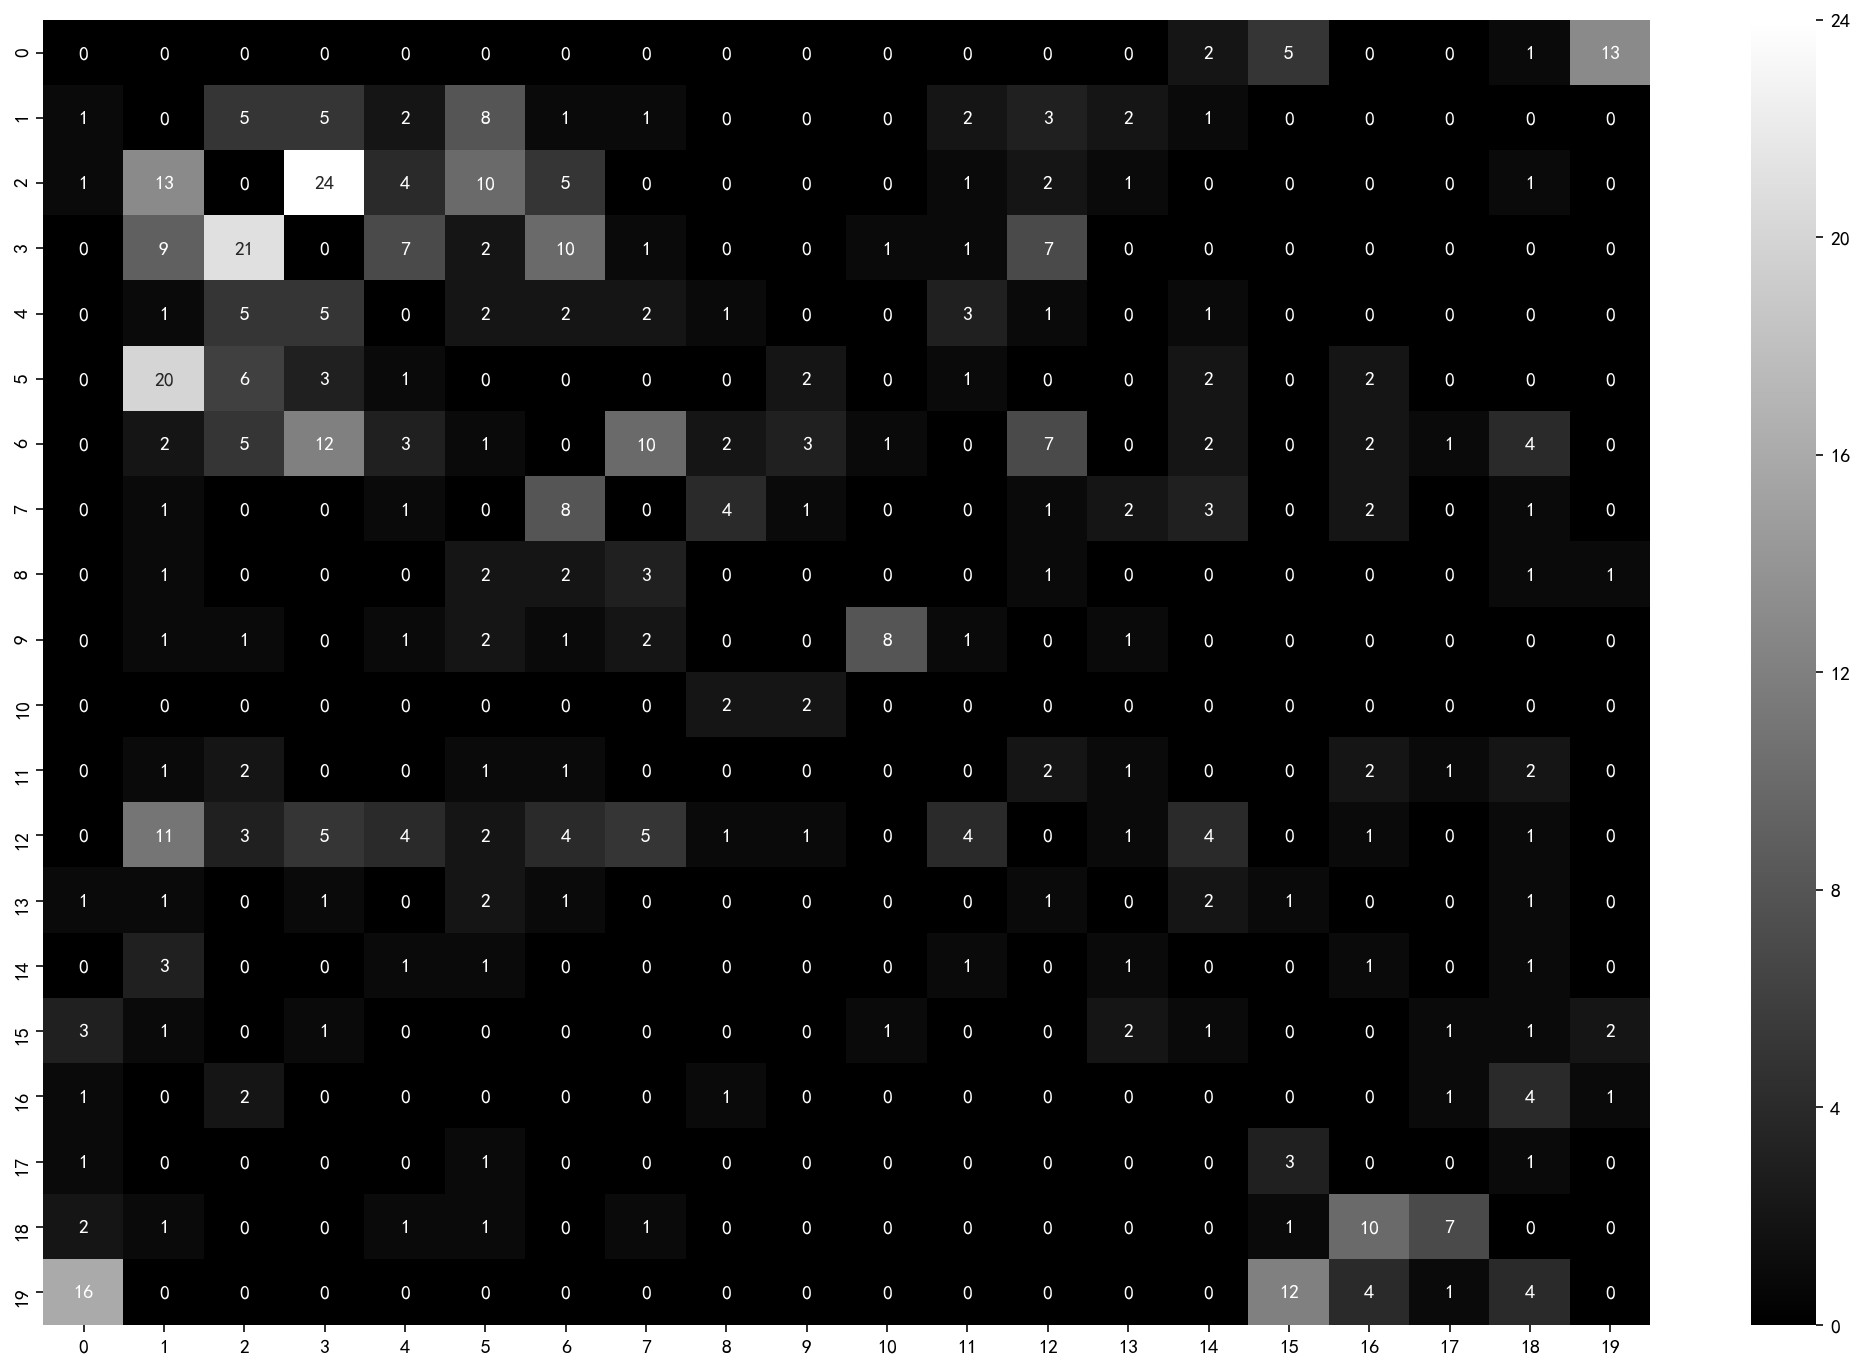

In [15]:
plt.figure(figsize=(18, 12))
sns.heatmap(con_mat, cmap=plt.cm.gray, annot=True, fmt='d')
plt.show()